In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
import seaborn as sns

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2") # this is the same tokenizer that openai uses for gpt3

In [3]:
path_to_data = "./datasets/kleister_charity_test_set/in.tsv"
path_to_headers = "./datasets/kleister_charity_test_set/in-header.tsv"

data = pd.read_csv(path_to_data, sep="\t", header=None)
headers = pd.read_csv(path_to_headers, sep="\t", header=None)
data.columns = headers.iloc[0]
data = data.drop(columns=["text_djvu", "text_tesseract", "text_textract"])

In [4]:
data.head()

,filename,keys,text_best
0,abbf98ed31e28068150dce58296302ee.pdf,address__post_town address__postcode address__...,PRAESTAT OPES SAPIENTIA\nHAMPTON SCHOOL\n(A Ch...
1,f3e363848aea2fa645814f2de0221a5a.pdf,address__post_town address__postcode address__...,28 November 2015\nHPPC Financial Statements YE...
2,62acdd1bbd0dfeea27da2720eb795449.pdf,address__post_town address__postcode address__...,1\nIER\nMarch 2012\nIndependent Examiner’s\nRe...
3,e734bc7dfc9b37c5dd2c3a37693062e8.pdf,address__post_town address__postcode address__...,~e-SCh44\nBreachwood Green PreSchool\nRegister...
4,cb6b0949a2f9294750e436f7ea2f10ce.pdf,address__post_town address__postcode address__...,hahcrar alcrlfcrd haptat church\nBishop's Stor...


In [5]:
len(data)

609

Let's look at how many tokens are in the documents and save it in the dataframe.

In [6]:
data["text_best_number_of_tokens"] = data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (30796 > 1024). Running this sequence through the model will result in indexing errors


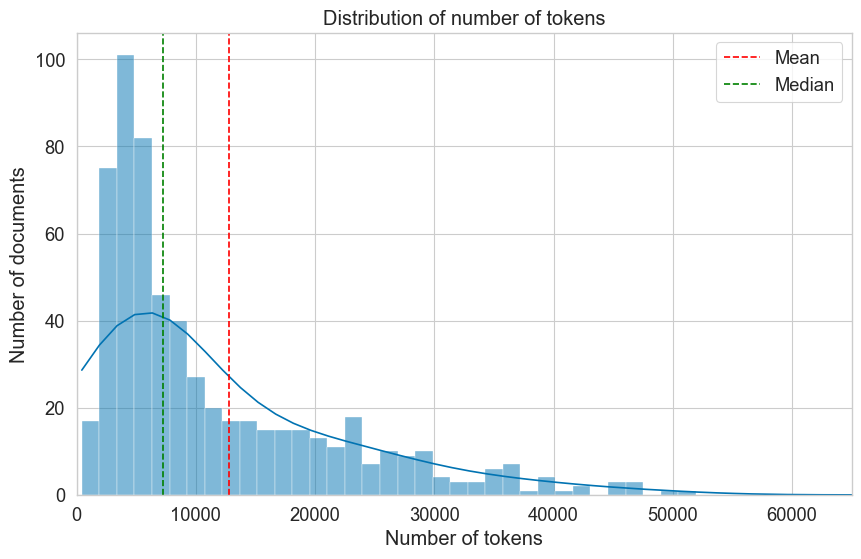

In [8]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x=data["text_best_number_of_tokens"], kde=True, ax=ax, bins=200)
ax.set_title("Distribution of number of tokens")
ax.set_xlabel("Number of tokens")
ax.set_ylabel("Number of documents")
ax.axvline(data["text_best_number_of_tokens"].mean(), color="red", linestyle="--", label="Mean")
ax.axvline(data["text_best_number_of_tokens"].median(), color="green", linestyle="--", label="Median")

ax.legend()
ax.set_xlim(0, 65000)

plt.show()
fig.savefig("token_distribution_zoom.png", dpi=300)

In [9]:
print(f"Median: {data['text_best_number_of_tokens'].median()}")
print(f"Mean: {data['text_best_number_of_tokens'].mean()}")
print(f"Max: {data['text_best_number_of_tokens'].max()}")
print(f"Min: {data['text_best_number_of_tokens'].min()}")
print(f"Std: {data['text_best_number_of_tokens'].std()}")

Median: 7206.0
Mean: 12746.845648604269
Max: 294640
Min: 439
Std: 19274.031889704525


In [13]:
# get the text of the entry with the minimum length
shortest = data[data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"])) == data["text_best_number_of_tokens"].min()]["text_best"].values[0]
print(shortest[:500])

'SWALLOWNEST PLAYGROUP\\nCharity No 1042186\\nANNUAL REPORT 2015-16\\nThis year we have held our level of funds that has allowed\\nschool to continue to deliver a high level of Early Years child\\neducation.\\nThis year we maintained our Quality Mark status.\\nThe staff continued to attend various training courses in\\norder to maintain the high standard of teaching required.\\nThe staff and parent committee were able to secure the\\nfunds to decorate the classroom and the work has been\\ncompleted.\\nThe st'

We can see that the text contains double escape for the newline character, i.e. `\\n` instead of `\n`. This also leads to the fact that the string is not represented correctly when printing it.

In [36]:
shortest = shortest.replace("\\n", "\n")
print(shortest)

SWALLOWNEST PLAYGROUP
Charity No 1042186
ANNUAL REPORT 2015-16
This year we have held our level of funds that has allowed
school to continue to deliver a high level of Early Years child
education.
This year we maintained our Quality Mark status.
The staff continued to attend various training courses in
order to maintain the high standard of teaching required.
The staff and parent committee were able to secure the
funds to decorate the classroom and the work has been
completed.
The staff and parent committee continue to work together to
obtain funds for teaching and educational resources.
With continued support from parents and the community we
will continue to move forward.
Income Statement for Period
Ended August 2015 to July 2016
Interest
8.86
Funding
41934.01
Fees
23446.17
Fees
Total Receipts
65389.04
Redundancy Provision
1300.00
CO-OP
800.44
Wages
49273.92
Room Hire
5265.32
Play Items
2651.34
Photo Copying
216.00
Petty Cash
120.00
Equipment
349.00
Postage
1895.05
Misc
622.80
Cleani

This looks much better. Let's do it for all rows and also for other control characters. Let's also remove redundant spaces.

In [15]:
data["text_best_cleaned"] = data["text_best"].apply(lambda x: x.replace("\\n", "\n").replace("\\t", "\t").replace("\\r", "\r").replace("\\", "").replace("  ", " "))


Let's save the number of tokens of the cleaned text.

In [16]:
data["text_best_cleaned_number_of_tokens"] = data["text_best_cleaned"].apply(lambda x: len(tokenizer(x)["input_ids"]))

In [17]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens
0,abbf98ed31e28068150dce58296302ee.pdf,address__post_town address__postcode address__...,PRAESTAT OPES SAPIENTIA\nHAMPTON SCHOOL\n(A Ch...,30796,PRAESTAT OPES SAPIENTIA\nHAMPTON SCHOOL\n(A Ch...,28003
1,f3e363848aea2fa645814f2de0221a5a.pdf,address__post_town address__postcode address__...,28 November 2015\nHPPC Financial Statements YE...,29596,28 November 2015\nHPPC Financial Statements YE...,27039
2,62acdd1bbd0dfeea27da2720eb795449.pdf,address__post_town address__postcode address__...,1\nIER\nMarch 2012\nIndependent Examiner’s\nRe...,4369,1\nIER\nMarch 2012\nIndependent Examiner’s\nRe...,3582
3,e734bc7dfc9b37c5dd2c3a37693062e8.pdf,address__post_town address__postcode address__...,~e-SCh44\nBreachwood Green PreSchool\nRegister...,3016,~e-SCh44\nBreachwood Green PreSchool\nRegister...,2720
4,cb6b0949a2f9294750e436f7ea2f10ce.pdf,address__post_town address__postcode address__...,hahcrar alcrlfcrd haptat church\nBishop's Stor...,13639,hahcrar alcrlfcrd haptat church\nBishop's Stor...,12218


In [23]:
print(f"Median: {data['text_best_cleaned_number_of_tokens'].median()}")
print(f"Mean: {data['text_best_cleaned_number_of_tokens'].mean()}")
print(f"Max: {data['text_best_cleaned_number_of_tokens'].max()}")
print(f"Min: {data['text_best_cleaned_number_of_tokens'].min()}")
print(f"Std: {data['text_best_cleaned_number_of_tokens'].std()}")

print(f"Total number of tokens before cleaning: {data['text_best_number_of_tokens'].sum()}")
print(f"Total number of tokens after cleaning: {data['text_best_cleaned_number_of_tokens'].sum()}")

print(f"Percent of tokens that were removed: {100 - (data['text_best_cleaned_number_of_tokens'].sum() / data['text_best_number_of_tokens'].sum()) * 100}")

Median: 6470.0
Mean: 11479.904761904761
Max: 270497
Min: 375
Std: 17510.846954669618
Total number of tokens before cleaning: 7762829
Total number of tokens after cleaning: 6991262
Percent of tokens that were removed: 9.939250239828795


Let's see how many documents have a length longer than 4000 tokens after cleaning, which is the maximum number of tokens that the Davinci model from OpenAI can handle as input. Note that there are 609 documents in total. Basically 3 out of 4 documents are too long.

In [26]:
len(data[data["text_best_cleaned_number_of_tokens"] > 4000])

444

In [29]:
# print text_best_cleaned of an entry with more than 4000 tokens
print(data[data["text_best_cleaned_number_of_tokens"] > 4000]["text_best_cleaned"].values[0])
# print the number of tokens of the same entry
print(data[data["text_best_cleaned_number_of_tokens"] > 4000]["text_best_cleaned_number_of_tokens"].values[0])

PRAESTAT OPES SAPIENTIA
HAMPTON SCHOOL
(A Charitable Company Limited by Guarantee)
REPORT AND FINANCIAL STATEMENTS
FOR THE YEAR ENDED 31 AUGUST 2016
Registered Company No: 06264434
Registered Charity No: 1120005
HAMPTON SCHOOL
CONTENTS
Page
Chairman's Report
1
Legal and administrative information
2-3
Governors' report
4-26
Independent Auditor's report
27
Statement of financial activities for the year ended 31 August 2016
28
Statement of financial activities for the year ended 31 August 2015
29
Balance sheet
30
Cas hf low statement
31
Notes to the financial statements
32-48
HAMPTON SCHOOL- CHAIRMAN'S REPORT- FOR THE YEAR ENDED 31 AUGUST 2016
I'm delighted to say that it has been another very successful year for our Trust and its Schools . This success was very
publicly recognised by the team from the Independent Schools Inspectorate {ISI) which inspected the Schools in March
2016. Its Report highlighted the very many excellent areas of the Schools' activities and particularly concluded 

Ideas:
* Remove all new lines. Saves 3000 tokens in the example above, so from 28000 -> 25000. similar savings as first cleaning but destroys structure -> Nope, we should probably keep it
* Only look at first 1500 tokens and last 1500 tokens and pray that the result is in there
* remove long words
* remove words that are not in gpt dictionary
* remove page numbers
* use own ocr and only look at first and last page, or first page and any page that cointains a pound symbol
* lowercase everything

* a combination of any of those
* only if necessary (e.g. if input >3700 tokens)

In [35]:
# get first entry and show column "keys"
data.iloc[510]["keys"]

'address__post_town address__postcode address__street_line charity_name charity_number income_annually_in_british_pounds report_date spending_annually_in_british_pounds'

Let's look at an example using the Davinci model to get an idea of how this approach would work.

We can see that the model output were XX tokens. It includes all 8 keys. To be safe with long charity names and other stuff, let's say the maximum length of the output of the model to 256 token. This should easily cover all documents.

We will later check whether any generation actually was close to, or actually 256 tokens long. If so, we should re-run the experiment with a higher maximum length of the model.